# Import

In [2]:
import os
import librosa 
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa.display
import tensorflow as tf

from tqdm import tqdm
from scipy.io import wavfile as wav

2023-01-20 10:03:48.631917: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-20 10:03:48.891769: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-01-20 10:03:49.992258: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.3/lib64
2023-01-20 10:03:49.992367: W tensorflow/compiler/xla/strea

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

2023-01-20 10:03:52.604656: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-01-20 10:03:52.604708: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: ubuntu
2023-01-20 10:03:52.604714: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: ubuntu
2023-01-20 10:03:52.604898: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 525.78.1
2023-01-20 10:03:52.604917: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 525.78.1
2023-01-20 10:03:52.604921: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 525.78.1


## 예시

In [60]:
sound_bad = '../record/안좋아요_1.wav'

In [61]:
example_list = [sound_bad]#, filename_laugh, filename_noise, filename_silence, filename_fall]
librosa_sample_rate  = 0

In [277]:
def draw_sound(filename):
    plt.figure(figsize = (12, 4))
    data, librosa_sample_rate  = librosa.load(filename)
    plt.title('sound_bad_1.wav')
    librosa.display.waveshow(data, sr = librosa_sample_rate)

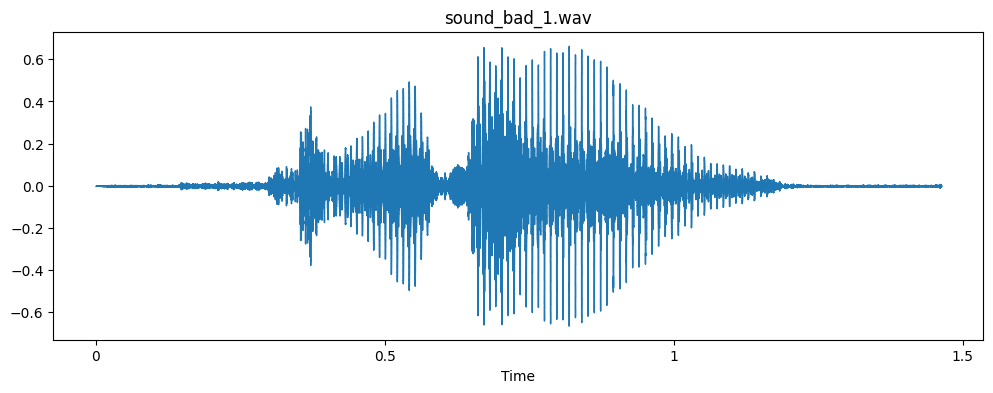

In [278]:
for i in  example_list:
    draw_sound(i)

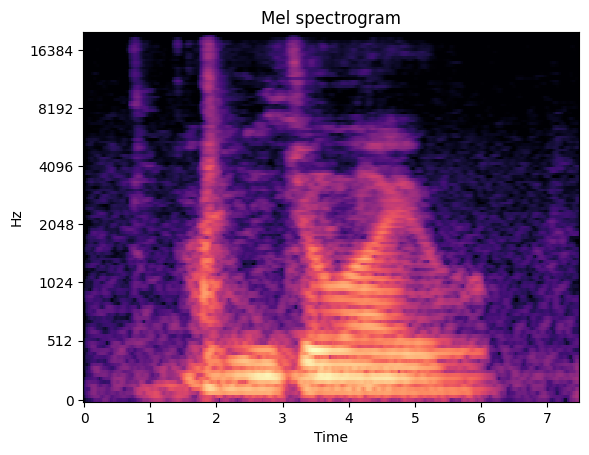

In [279]:
# melspectrogram
y, sr = librosa.load(sound_bad)
yt, _ = librosa.effects.trim(y)
y = yt
plt.title('Mel spectrum')
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=100)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=20000, x_axis='time')

In [82]:
# mfcc

filename = '../record/안좋아요_1.wav' 

librosa_audio, librosa_sample_rate = librosa.load(filename) 
# scipy_sample_rate, scipy_audio = wav.read(filename) 
print(librosa_audio.shape)
# print('Original sample rate:', scipy_sample_rate) 
print('Librosa sample rate:', librosa_sample_rate) 

mfccs = librosa.feature.mfcc(y = librosa_audio, sr = librosa_sample_rate, n_mfcc = n_mfcc)
print(mfccs.shape)

(32256,)
Librosa sample rate: 22050
(40, 64)


Text(0, 0.5, 'MFCC coeff')

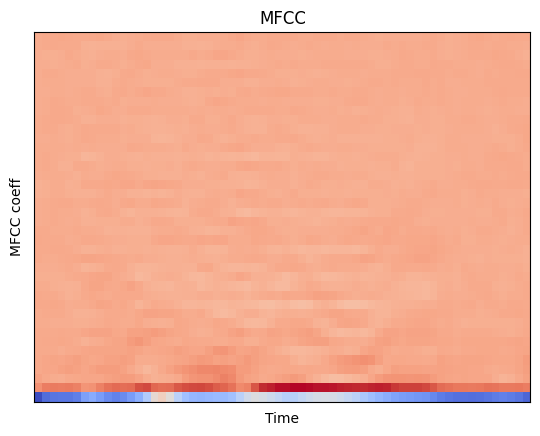

In [97]:
plt.title('MFCC')
librosa.display.specshow(mfccs, sr=librosa_sample_rate)
plt.xlabel('Time')
plt.ylabel('MFCC coeff')

In [98]:
train_path = os.listdir('../record/')
train_path

['안좋아요_8.wav',
 '안좋아요_7.wav',
 '아_8.wav',
 '좋아요_10.wav',
 '아_1.wav',
 '안좋아요_1.wav',
 '좋아요_8.wav',
 '좋아요_3.wav',
 '안좋아요_14.wav',
 '좋아요_13.wav',
 '좋아요_15.wav',
 '좋아요_14.wav',
 '아_13.wav',
 '아_9.wav',
 '안좋아요_9.wav',
 '아_7.wav',
 '아_4.wav',
 '좋아요_7.wav',
 '안좋아요_11.wav',
 '안좋아요_2.wav',
 '안좋아요_4.wav',
 '좋아요_12.wav',
 '좋아요_5.wav',
 '아_15.wav',
 '좋아요_1.wav',
 '아_14.wav',
 '안좋아요_12.wav',
 '아_5.wav',
 '좋아요_4.wav',
 '안좋아요_3.wav',
 '안좋아요_6.wav',
 '안좋아요_15.wav',
 '안좋아요_10.wav',
 '아_11.wav',
 '좋아요_11.wav',
 '아_2.wav',
 '안좋아요_13.wav',
 '아_10.wav',
 '좋아요_2.wav',
 '아_12.wav',
 '좋아요_9.wav',
 '안좋아요_5.wav',
 '아_6.wav',
 '좋아요_6.wav',
 '아_3.wav']

# 데이터

In [4]:
wav_dict = {'네' : 0,
            '아니요' : 1}

In [6]:
wav_files = []

for file in os.listdir(f'./record_yes_no/'):
    wav_files.append(f'./record_yes_no/{file}')
    
wav_df = pd.DataFrame({'path': wav_files})
wav_df['label'] = wav_df['path'].apply(lambda x: x.split('/')[-1])
wav_df['label'] = wav_df['label'].apply(lambda x: x.split('.')[0])
wav_df['label'] = wav_df['label'].apply(lambda x: x.split('_')[0])

wav_df

,path,label
0,./record_yes_no/1.네_88.wav,1
1,./record_yes_no/1.아니요_16.wav,1
2,./record_yes_no/1.네_27.wav,1
3,./record_yes_no/1.아니요_57.wav,1
4,./record_yes_no/1.네_84.wav,1
...,...,...
193,./record_yes_no/1.네_3.wav,1
194,./record_yes_no/1.아니요_66.wav,1
195,./record_yes_no/1.네_9.wav,1
196,./record_yes_no/1.네_71.wav,1


In [8]:
wav_df['label']

0        좋아
1       별로야
2         아
3       힘들어
4      안좋아요
       ... 
165     좋아요
166       아
167     좋아요
168       아
169    하기싫다
Name: label, Length: 170, dtype: object

## 라벨로 변환

In [9]:
class_label = []

for label in wav_df['label']:
    if label in wav_dict:
        class_label.append(wav_dict[label])
        
wav_df['class_label'] = class_label
wav_df

,path,label,class_label
0,../record/좋아_7.wav,좋아,7
1,../record/별로야_4.wav,별로야,5
2,../record/아_21.wav,아,0
3,../record/힘들어_18.wav,힘들어,3
4,../record/안좋아요_8.wav,안좋아요,2
...,...,...,...
165,../record/좋아요_18.wav,좋아요,1
166,../record/아_6.wav,아,0
167,../record/좋아요_6.wav,좋아요,1
168,../record/아_3.wav,아,0


In [10]:
from sklearn.model_selection import train_test_split

train_data, val_data = train_test_split(wav_df,
                                        test_size=0.2,
                                        stratify=wav_df['class_label'],
                                        random_state=7)

In [11]:
X_train = train_data['path']
y_train = train_data['class_label']

In [12]:
X_val = val_data['path']
y_val = val_data['class_label']

In [13]:
# Search the max_len of mfccs
n_mfcc = 40  # Initialize n_mfcc
shapes= []

for i in range(len(wav_df)):
    librosa_audio, librosa_sample_rate = librosa.load(wav_df.iloc[i, 0]) 
    mfccs = librosa.feature.mfcc(y = librosa_audio, sr = librosa_sample_rate, n_mfcc = n_mfcc)
    shapes.append(mfccs.shape[1])

print('max_len :', max(shapes))
print(librosa_sample_rate)

max_len : 168
22050


In [14]:
max_pad_len = max(shapes)

def extract_feature(file_name):
    print('file name :', file_name)
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0,0), (0, pad_width)), mode='constant')
        print(mfccs.shape)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        print(e);
        return None
    
#     return padded_mfccs
    return mfccs

In [15]:
features_train = []

for i, wav in enumerate(X_train):
    mfccs = extract_feature(wav)
    features_train.append([mfccs, y_train.values[i]])#, y_train[i]])

features_df = pd.DataFrame(features_train, columns=['feature', 'class_label'])

file name : ../record/좋아요_9.wav
(40, 168)
file name : ../record/힘들어_19.wav
(40, 168)
file name : ../record/좋아요_21.wav
(40, 168)
file name : ../record/안좋아요_28.wav
(40, 168)
file name : ../record/아_23.wav
(40, 168)
file name : ../record/하기싫다_11.wav
(40, 168)
file name : ../record/힘들어_5.wav
(40, 168)
file name : ../record/힘들어_6.wav
(40, 168)
file name : ../record/피곤해_9.wav
(40, 168)
file name : ../record/피곤해_11.wav
(40, 168)
file name : ../record/별로야_13.wav
(40, 168)
file name : ../record/피곤해_19.wav
(40, 168)
file name : ../record/좋아요_16.wav
(40, 168)
file name : ../record/좋아요_22.wav
(40, 168)
file name : ../record/안좋아요_10.wav
(40, 168)
file name : ../record/별로야_15.wav
(40, 168)
file name : ../record/아_8.wav
(40, 168)
file name : ../record/피곤해_1.wav
(40, 168)
file name : ../record/좋아요_12.wav
(40, 168)
file name : ../record/피곤해_7.wav
(40, 168)
file name : ../record/별로야_20.wav
(40, 168)
file name : ../record/좋아요_10.wav
(40, 168)
file name : ../record/힘들어_10.wav
(40, 168)
file name : ../reco

In [16]:
features_df 

,feature,class_label
0,"[[-556.4879, -506.64972, -497.8446, -496.55014...",1
1,"[[-539.6129, -455.2974, -432.7231, -444.17596,...",3
2,"[[-602.67206, -592.75824, -460.25888, -415.009...",1
3,"[[-562.22345, -562.22345, -465.10858, -361.683...",2
4,"[[-530.0011, -525.5837, -411.0564, -360.13898,...",0
...,...,...
131,"[[-545.9949, -478.34296, -461.32227, -471.387,...",2
132,"[[-608.6877, -608.6877, -608.6877, -565.0706, ...",4
133,"[[-625.641, -619.0723, -510.74515, -472.1709, ...",6
134,"[[-474.83017, -393.49988, -369.8644, -376.9260...",4


In [17]:
features_val = []

for i, wav in enumerate(X_val):
    mfccs = extract_feature(wav)
    features_val.append([mfccs, y_val.values[i]])#, y_val[i]])

features_val_df = pd.DataFrame(features_val, columns=['feature', 'class_label'])

file name : ../record/안좋아요_11.wav
(40, 168)
file name : ../record/좋아_8.wav
(40, 168)
file name : ../record/별로야_16.wav
(40, 168)
file name : ../record/아_19.wav
(40, 168)
file name : ../record/하기싫다_18.wav
(40, 168)
file name : ../record/아_12.wav
(40, 168)
file name : ../record/힘들어__10.wav
(40, 168)
file name : ../record/피곤해_20.wav
(40, 168)
file name : ../record/아_11.wav
(40, 168)
file name : ../record/힘들어_15.wav
(40, 168)
file name : ../record/힘들어_20.wav
(40, 168)
file name : ../record/하기싫다_17.wav
(40, 168)
file name : ../record/별로야_18.wav
(40, 168)
file name : ../record/피곤해_13.wav
(40, 168)
file name : ../record/좋아요_2.wav
(40, 168)
file name : ../record/피곤해_4.wav
(40, 168)
file name : ../record/좋아요_6.wav
(40, 168)
file name : ../record/좋아요_18.wav
(40, 168)
file name : ../record/좋아요_24.wav
(40, 168)
file name : ../record/별로야_19.wav
(40, 168)
file name : ../record/좋아_15.wav
(40, 168)
file name : ../record/안좋아요_2.wav
(40, 168)
file name : ../record/아_1.wav
(40, 168)
file name : ../record/

In [18]:
features_val_df

,feature,class_label
0,"[[-518.6827, -472.5177, -474.33472, -488.1168,...",2
1,"[[-605.2328, -602.3072, -549.0014, -486.61987,...",7
2,"[[-580.1401, -516.9003, -506.90793, -514.51666...",5
3,"[[-568.6423, -553.1414, -501.0636, -471.0777, ...",0
4,"[[-537.1393, -432.94684, -370.56857, -347.0616...",6
5,"[[-546.3734, -492.19882, -498.41135, -518.2447...",0
6,"[[-609.9353, -593.7104, -481.96072, -415.7567,...",3
7,"[[-542.33575, -477.64648, -469.67755, -481.534...",4
8,"[[-603.30255, -549.5591, -544.9405, -553.48334...",0
9,"[[-543.96356, -493.0766, -483.80774, -476.9279...",3


In [19]:
np.array(features_df.feature.tolist()).shape

(136, 40, 168)

In [20]:
X_train = np.array(features_df.feature.tolist())
y_train = np.array(features_df.class_label.tolist())

In [21]:
X_train.shape

(136, 40, 168)

In [22]:
X_val = np.array(features_val_df.feature.tolist())
y_val = np.array(features_val_df.class_label.tolist())

In [23]:
X_val.shape

(34, 40, 168)

In [24]:
num_rows = n_mfcc
num_columns = max(shapes)
num_channels = 1

X_train = X_train.reshape(X_train.shape[0], num_rows, num_columns, num_channels)
X_val = X_val.reshape(X_val.shape[0], num_rows, num_columns, num_channels)

In [25]:
X_train.shape

(136, 40, 168, 1)

# 모델 생성

In [26]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

## 콜백

In [27]:
### ReduceLROnPlateau 콜백

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor = 'val_accuracy',
    patience = 2,
    verbose = 1,
    factor = 0.5,
    min_lr = 0.000000001
)

In [28]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_accuracy',
    patience = 5,
    verbose = 1,
    mode = 'max'
)

In [29]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    monitor = 'val_accuracy',
    filepath = 'mfcc_.{epoch:02d}-{val_accuracy:.6f}.hdf5',
    verbose = 1,
    save_best_only = True,
    save_weights_only = True
)

In [34]:
#CNN모델 구현
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, input_shape=(num_rows, num_columns, num_channels), 
                 padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.25))

# model.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu'))
# model.add(MaxPooling2D(pool_size = 2))
# model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(len(wav_dict), activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 40, 168, 32)       320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 20, 84, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 20, 84, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 20, 84, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 42, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 10, 42, 64)       

In [35]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = 'accuracy')

## 모델 훈련

In [36]:
history = model.fit(X_train,
                 y_train,
                 epochs=200,
                 verbose=1,
                 validation_data=(X_val, y_val)
                )#callbacks = [reduce_lr, early_stopping, checkpoint])

Epoch 1/200


2023-01-18 11:43:13.878505: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_5/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


5/5 [==============================] - 1s 38ms/step - loss: 104.6435 - accuracy: 0.0735 - val_loss: 38.9278 - val_accuracy: 0.0588
Epoch 2/200
5/5 [==============================] - 0s 15ms/step - loss: 37.6592 - accuracy: 0.1471 - val_loss: 4.4055 - val_accuracy: 0.1471
Epoch 3/200
5/5 [==============================] - 0s 15ms/step - loss: 5.4001 - accuracy: 0.2647 - val_loss: 2.1232 - val_accuracy: 0.1765
Epoch 4/200
5/5 [==============================] - 0s 15ms/step - loss: 2.1232 - accuracy: 0.2206 - val_loss: 2.1192 - val_accuracy: 0.1765
Epoch 5/200
5/5 [==============================] - 0s 14ms/step - loss: 1.9459 - accuracy: 0.2500 - val_loss: 2.0896 - val_accuracy: 0.1765
Epoch 6/200
5/5 [==============================] - 0s 14ms/step - loss: 1.9573 - accuracy: 0.2426 - val_loss: 2.0782 - val_accuracy: 0.1765
Epoch 7/200
5/5 [==============================] - 0s 13ms/step - loss: 1.8988 - accuracy: 0.3235 - val_loss: 2.0745 - val_accuracy: 0.2353
Epoch 8/200
5/5 [===========

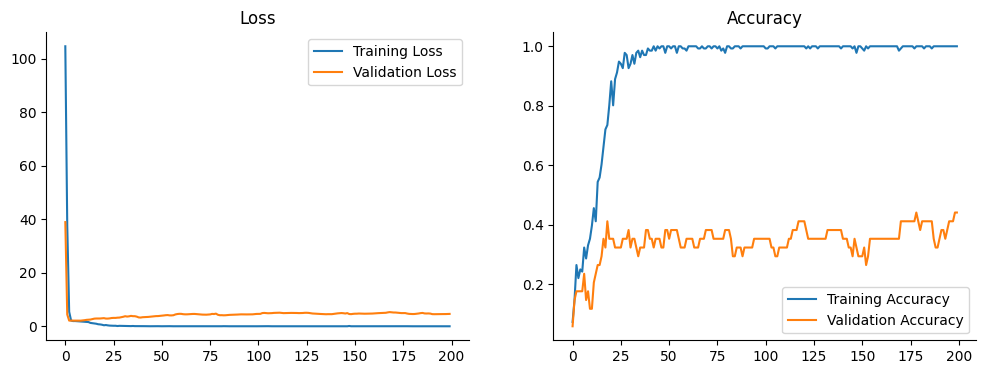

In [37]:
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize = (12, 4))

sns.lineplot(x = range(len(history.history['loss'])),
             y = history.history['loss'], ax = axes[0],
             label = 'Training Loss')

sns.lineplot(x = range(len(history.history['loss'])),
             y = history.history['val_loss'], ax = axes[0],
             label = 'Validation Loss')

sns.lineplot(x = range(len(history.history['accuracy'])),
             y = history.history['accuracy'], ax = axes[1],
             label = 'Training Accuracy')

sns.lineplot(x = range(len(history.history['accuracy'])),
             y = history.history['val_accuracy'], ax = axes[1],
             label = 'Validation Accuracy')
axes[0].set_title('Loss')
axes[1].set_title('Accuracy')

sns.despine()
plt.show()

In [38]:
def predict_features(file_name, max_pad_len, n_mfcc):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
    pad_width = max_pad_len - mfccs.shape[1]
    mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
    mfccs = mfccs.reshape(1, n_mfcc, max_pad_len, 1)
    
    return mfccs

In [39]:
val_data

,path,label,class_label
73,../record/안좋아요_11.wav,안좋아요,2
56,../record/좋아_8.wav,좋아,7
40,../record/별로야_16.wav,별로야,5
57,../record/아_19.wav,아,0
75,../record/하기싫다_18.wav,하기싫다,6
154,../record/아_12.wav,아,0
27,../record/힘들어__10.wav,힘들어,3
24,../record/피곤해_20.wav,피곤해,4
138,../record/아_11.wav,아,0
99,../record/힘들어_15.wav,힘들어,3


In [40]:
np.argmax(model.predict(predict_features('../record/아_2.wav', max(shapes), n_mfcc)))

1/1 [==============================] - 0s 106ms/step


0

In [41]:
# Count wrong data
cnt = 0

for i, data in enumerate(val_data['path']):
    prediction = np.argmax(model.predict(predict_features(data, max(shapes), n_mfcc)))
    real = val_data.iloc[i, 2]
    print('predict :', prediction)
    print('real :', real)
    if prediction != real:
        cnt += 1

print('count :', cnt, '/', len(val_data))

1/1 [==============================] - 0s 23ms/step
predict : 2
real : 2
1/1 [==============================] - 0s 21ms/step
predict : 1
real : 7
1/1 [==============================] - 0s 33ms/step
predict : 1
real : 5
1/1 [==============================] - 0s 23ms/step
predict : 0
real : 0
1/1 [==============================] - 0s 19ms/step
predict : 7
real : 6
1/1 [==============================] - 0s 31ms/step
predict : 1
real : 0
1/1 [==============================] - 0s 23ms/step
predict : 1
real : 3
1/1 [==============================] - 0s 25ms/step
predict : 4
real : 4
1/1 [==============================] - 0s 29ms/step
predict : 1
real : 0
1/1 [==============================] - 0s 21ms/step
predict : 3
real : 3
1/1 [==============================] - 0s 26ms/step
predict : 1
real : 3
1/1 [==============================] - 0s 25ms/step
predict : 5
real : 6
1/1 [==============================] - 0s 31ms/step
predict : 6
real : 5
1/1 [==============================] - 0s 25ms/step

# 음성 인식

In [91]:
reverse_dict= dict(map(reversed, wav_dict.items()))

In [96]:
reverse_dict

{0: '아', 1: '좋아요', 2: '안좋아요', 3: '힘들어', 4: '피곤해', 5: '별로야', 6: '하기싫다', 7: '좋아'}

In [95]:
import librosa
import sounddevice as sd
import numpy as np

# Collect microphone audio for 5 seconds
fs = 22050  # Sample rate
duration = 2  # Seconds
recording = sd.rec(int(fs * duration), samplerate=fs, channels=1)
sd.wait()
print('recording...')
recording = recording.flatten()
print(recording.shape)
# Extract MFCCs from microphone recording
mfccs = librosa.feature.mfcc(y=recording, sr=librosa_sample_rate, n_mfcc=n_mfcc)
print(mfccs)
print(librosa_sample_rate)
print(mfccs.shape)
pad_width = max_pad_len - mfccs.shape[1]
print('pad_width', pad_width)
mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
mfccs = mfccs.reshape(1, n_mfcc, max_pad_len, 1)

# # Use MFCCs as input to your CNN model
prediction = model.predict(mfccs)
print(reverse_dict[np.argmax(prediction)])

recording...
(44100,)
[[-112.52772     -33.7896      -40.282063   ... -289.83337
  -289.13217    -315.84543   ]
 [ 133.05797     112.834045    123.56918    ...  133.75043
   139.08813     139.73553   ]
 [  -3.904523    -20.54636     -15.54677    ...   20.44077
    22.659868     23.64292   ]
 ...
 [   7.115034      6.309864      3.1599007  ...    4.4849834
     3.2678242     0.9105984 ]
 [   0.6245899     1.5586038     0.52861524 ...    2.7970803
     4.262596      5.203932  ]
 [   2.3437533     5.6693506     5.74502    ...    3.9554615
     4.182471      7.2216706 ]]
22050
(40, 87)
pad_width 81
1/1 [==============================] - 0s 23ms/step
하기싫다
